In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('fivethirtyeight')
sns.set_context("talk")
sns.set_theme()
#plt.style.use('default') # revert style to default mpl
adjust_fontsize(size=20)
%matplotlib inline

Plotting helper functions.

In [18]:
# helper functions to plot and 
# compute expectation, variance, standard deviation
def plot_dist(dist_df,
                      xname="x", pname="P(X = x)", varname="X",
                      save=False):
    """
    Plot a distribution from a distribution table.
    Single-variate.
    """
    plt.bar(dist_df[xname], dist_df[pname])
    plt.ylabel(pname)
    plt.xlabel(xname)
    plt.title(f"Distribution of ${varname}$")
    plt.xticks(sorted(dist_df[xname].unique()))
    if save:
        fig = plt.gcf()
        fig.patch.set_alpha(0.0)
        plt.savefig(f"dist{varname}.png", bbox_inches = 'tight');


def simulate_samples(df, xname="x", pname="P(X = x)", size=1):
    return np.random.choice(
                df[xname], # draw from these choiecs
                size=size, # this many times
                p=df[pname]) # according to this distribution

def simulate_iid_df(dist_df, nvars, rows, varname="X"):
    """
    Make an (row x nvars) dataframe
    by calling simulate_samples for each of the nvars per row
    """
    sample_dict = {}
    for i in range(nvars):
        # generate many datapoints 
        sample_dict[f"{varname}_{i+1}"] = \
            simulate_samples(dist_df, size=rows)
    return pd.DataFrame(sample_dict)


def plot_simulated_dist(df, colname, show_stats=True, save=False, **kwargs):
    """
    Plot a simulated population.
    """
    sns.histplot(data=df, x=colname, stat='probability', discrete=True, **kwargs)
    plt.xticks(sorted(df[colname].unique())) # if there are gaps)
    if show_stats:
        display(stats_df_multi(df, [colname]))
    if save:
        fig = plt.gcf()
        fig.patch.set_alpha(0.0)
        plt.savefig(f"sim{colname}.png", bbox_inches = 'tight');

def stats_df_multi(df, colnames):
    means = df[colnames].mean(axis=0)
    variances = df[colnames].var(axis=0)
    stdevs = df[colnames].std(axis=0)
    df_stats = pd.concat([means, variances, stdevs],axis=1).T
    df_stats['index_col'] = ["E[•]", "Var(•)", "SD(•)"]
    df_stats = df_stats.set_index('index_col', drop=True).rename_axis(None)
    return df_stats

def plot_simulated_dist_multi(df, colnames, show_stats=True):
    """
    If multiple columns provided, use separate plots.
    """
    ncols = 1
    nrows = len(colnames)
    plt.figure(figsize=(6, 2*nrows+2))
    
    for i, colname in enumerate(colnames):
        subplot_int = int(100*int(nrows) + 10*int(ncols) + int(i+1))
        plt.subplot(subplot_int)
        plot_simulated_dist(df, colname, show_stats=False)
    plt.tight_layout()
    if show_stats:
        display(stats_df_multi(df, colnames))

## Sum of 2 Dice Rolls
Here is the distribution of a single die roll:

In [19]:
roll_df = pd.DataFrame({"x": [1, 2, 3, 4, 5, 6],
                       "P(X = x)": np.ones(6)/6})
roll_df


,x,P(X = x)
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


Lrt $X_1, X_2$ are the outcomes of two dice rolls. Note $X_1$ & $X_2$ are i.i.d. (independent and identically distributed).

### Wanna simulate 80,000 different pairs of dice rolls?

Below, we call a helper function simulate_iid_df which simulates an 80,000-row table of $X_1$, $X_2$ values. It uses np.random.choice(arr, size, p) link where arr is the array the values p is the probability associated with choosing each value.

In [20]:
N = 80000
sim_rolls_df = simulate_iid_df(roll_df, nvars=2, rows=N)
sim_rolls_df

,X_1,X_2
0,3,2
1,4,2
2,2,5
3,4,6
4,5,2
...,...,...
79995,5,6
79996,2,3
79997,5,1
79998,1,1


Define the following random variables, which are functions of $X_1$ and $X_2$:

$Y$ = $X_1 + X_1 = 2X_1$

$Z$ = $X_1 + X_2$

We can use our simulated values of $X_1, X_2$ to create new columns $Y$ & $Z$:

In [21]:
sim_rolls_df['Y'] = 2*sim_rolls_df['X_1']
sim_rolls_df['Z'] = sim_rolls_df['X_1'] + sim_rolls_df['X_2']
sim_rolls_df

,X_1,X_2,Y,Z
0,3,2,6,5
1,4,2,8,6
2,2,5,4,7
3,4,6,8,10
4,5,2,10,7
...,...,...,...,...
79995,5,6,10,11
79996,2,3,4,5
79997,5,1,10,6
79998,1,1,2,2


,Y
E[•],7.019250
Var(•),11.707376
SD(•),3.421604


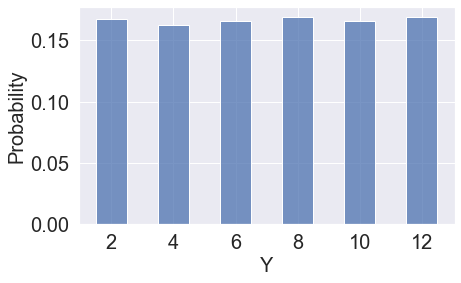

In [22]:
plot_simulated_dist(sim_rolls_df, "Y", save=True)

,Z
E[•],7.011913
Var(•),5.816368
SD(•),2.411715


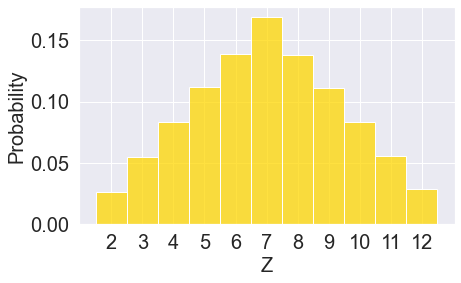

In [23]:
plot_simulated_dist(sim_rolls_df, "Z", save=True, color='gold')

In [24]:
stats_df_multi(sim_rolls_df, ["Y", "Z"])

,Y,Z
E[•],7.019250,7.011913
Var(•),11.707376,5.816368
SD(•),3.421604,2.411715


## Which would you pick?
$Y_A = 10X_1 + 10X_2$

$Y_B = \sum_{i=1}^{20} X_i$

$Y_C = 20X_1$

First, let's consider the probability distribution for a single coin.

This will let us flip 20 iid coins later.



In [25]:
#First construct probability distribution for a single fair coin
p = 0.5
coin_df = pd.DataFrame({"x":[0, 1], #Tails, heads
                       "P(X = x)": [p, 1-p]})
coin_df

,x,P(X = x)
0,0,0.5
1,1,0.5


## Choice A:
$Y_A = 10X_1 + 10X_2$

In [26]:
#Flip 20 iid coins, each exactly once
flips20_df = simulate_iid_df(coin_df, nvars=20, rows=1)

#Construct Y_A from this sample
flips20_df["Y_A"] = 10*flips20_df["X_1"] + 10*flips20_df["X_2"]

print("Sample of size 1:")
display(flips20_df)
print("Y_A", flips20_df.loc[0, "Y_A"])

Sample of size 1:


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,Y_A
0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


Y_A 0


## Choice B:
$Y_B = \sum_{i=1}^{20} X_i$

In [27]:
#Flip 20 iid coins, each exactly once
flips20_df = simulate_iid_df(coin_df, nvars=20, rows=1)

#Construct Y_B from this sample
flips20_df["Y_B"] = flips20_df.sum(axis=1) #sum all coins

display(flips20_df)
print("Y_B:", flips20_df.loc[0, "Y_B"])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,Y_B
0,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,4


Y_B: 4


## Choice C
$Y_C = 20X_1$

In [28]:
#Flip 20 iid coins, each exactly once
flips20_df = simulate_iid_df(coin_df, nvars=20, rows=1)

#Construct Y_C from this sample
flips20_df["Y_C"] = 20*flips20_df["X_1"]

display(flips20_df[["X_1", "Y_C"]])
print("Y_C", flips20_df.loc[0, "Y_C"])

,X_1,Y_C
0,0,0


Y_C 0


In [29]:
#How the look
#Code not in syllabus

80000 simulated samples


,Y_A,Y_B,Y_C
E[•],10.030375,10.008075,12.518562
Var(•),50.208455,4.950572,56.250359
SD(•),7.085792,2.224988,7.500024


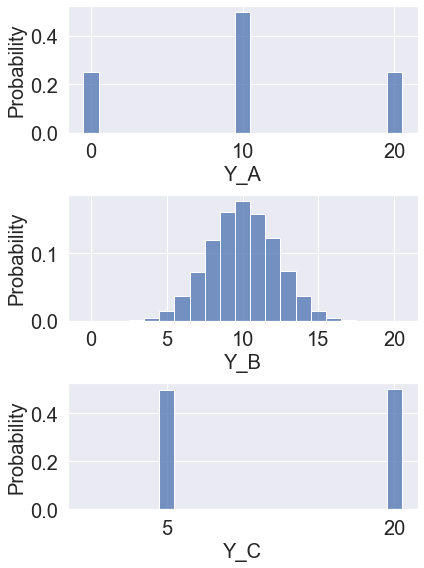

In [30]:
# simulate one big population of 20 fair flips, N = 80,000
N = 80000
df_coins = simulate_iid_df(coin_df, nvars=20, rows=N)
print(f"{N} simulated samples")


# construct Y_A, Y_B, Y_C from this population
df_coins["Y_A"] = 10*df_coins["X_1"] + 10*df_coins["X_2"]
df_coins["Y_B"] = df_coins.loc[:,"X_1":"X_20"].sum(axis=1)
df_coins["Y_C"] = 5 + 15*df_coins["X_1"]
plot_simulated_dist_multi(df_coins, ["Y_A", "Y_B", "Y_C"])

# adjust axes for nicer plotting
axs = plt.gcf().axes
axs[1].set_xlim(axs[0].get_xlim())    # Y_B
axs[1].set_xticks([0, 5, 10, 15, 20]) # Y_B
axs[2].set_xlim(axs[0].get_xlim())    # Y_C
plt.show()


     

If we flipped 100 coins, look how beautiful the Binomial distribution looks:

,Y_100
E[•],24.998275
Var(•),12.513603
SD(•),3.537457


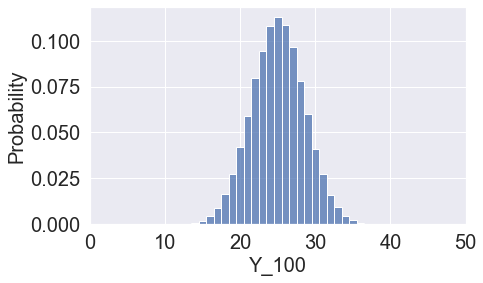

In [31]:

# simulate one big population of 100 fair flips, N = 80,000
N = 80000
df_coins = simulate_iid_df(coin_df, nvars=50, rows=N)
df_coins["Y_100"] = df_coins.loc[:,"X_1":"X_50"].sum(axis=1)
plot_simulated_dist(df_coins, "Y_100")
plt.xticks([0, 10, 20, 30, 40, 50])
plt.show()

